---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Cross Validation and Regularization

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Load the Diabetes dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

Reference:
   [http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf]

Load the features in a variable with name $\mathbf{X}$ and the target in a variable with name $\mathbf{y}$.

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
X.shape

(442, 10)

In [4]:
y.shape

(442,)

## 2. Evaluate a Linear Regression model using 10-fold cross-validation

Create a Linear Regression model and assign it to a variable with name **`lr`**.   
http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

Create a cross validation generator with 10 folds. Set the parameter **`shuffle`** to **`True`**, in order to shuffle the data before creating the folds. Set the parameter **`random_state`** to 0 to create always the same combination of folds.
Assign it to a variable with name **`cv`**.   
http://scikit-learn.org/stable/modules/cross_validation.html#k-fold

Use the function **`cross_val_score`** to evaluate the model using the cross validator. This function returns a list of scores.   
http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

Finally, print the mean and standard deviation of the scores.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

lr = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(lr, X, y, cv=cv)

print np.mean(scores), np.std(scores)

0.483866839067 0.113015374607


## 3. Redo the same evaluation, this time using the Mean Squared Error as score function

Check which score function is used by the validator by default.

Create a new scorer function that calculates the Mean Squared Error. You can use the function **`mean_squared_error`** from sklearn:   
http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

Use again the function **`cross_val_score`** to evaluate the model using the cross validator and the new scorer.

Finally, print the mean and standard deviation of the new scores.

In [ ]:
print lr.score.__doc__

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

lr = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(lr, X, y, cv=cv,
                         scoring=make_scorer(mean_squared_error))

print np.mean(scores), np.std(scores)

2985.22827259 472.547130651


## 4. Evaluate a Lasso model using 10-fold cross-validation

Create a Lasso model with default parameters and assign it to a variable with name **`lasso`**.   
http://scikit-learn.org/stable/modules/linear_model.html#lasso

Create a cross validation generator with 10 folds. Set the parameter **`shuffle`** to **`True`**, in order to shuffle the data before creating the folds. Set the parameter **`random_state`** to 0 to create always the same combination of folds.
Assign it to a variable with name **`cv`**.   
http://scikit-learn.org/stable/modules/cross_validation.html#k-fold

Use the function **`cross_val_score`** to evaluate the model using the cross validator.
Use the scorer function that calculates the Mean Squared Error to calculate the scores.   
http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

Finally, print the mean and standard deviation of the scores.

In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

lasso = Lasso()
cv = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(lasso, X, y, cv=cv,
                         scoring=make_scorer(mean_squared_error))

print np.mean(scores), np.std(scores)

3864.02224243 374.383087056


Compare the average scores of the Lasso model with the LinearRegression. Is it better? Why?

## 5. Find the best regularization parameter for a Lasso model using 10-fold cross-validation

Create a Lasso model with default parameters and assign it to a variable with name **`lasso`**.   
http://scikit-learn.org/stable/modules/linear_model.html#lasso

Create a list of values for the regularization parameter (alpha) starting from $10^{-4}$ to $10^{-0.5}$, spaced evenly on a log scale.

For each value of alpha, set the model parameter **`alpha`** to this value, calculate the 10-fold cross-validation scores, and add the average score to a list with name **`scores`**.

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

alphas = np.logspace(-4, -0.5, 20)
scores = []

for alpha in alphas:

    lasso = Lasso(alpha=alpha)
    cv = KFold(n_splits=10, shuffle=True, random_state=0)
    scores_model = cross_val_score(lasso, X, y, cv=cv)

    scores.append(np.mean(scores_model))
    print np.mean(scores), np.std(scores)

0.483858720051 0.0
0.483856412652 2.30739929116e-06
0.483853146657 4.988270563e-06
0.483848393149 9.29782928817e-06
0.483842822155 1.39033667434e-05
0.483843300022 1.27368804676e-05
0.483856803771 3.51163791872e-05
0.483874179031 5.65005539873e-05
0.483893298792 7.59087167449e-05
0.483902320013 7.69308899801e-05
0.483840973779 0.000207398005576
0.483742969281 0.000380897804113
0.483716146783 0.000377566223002
0.483715835364 0.000363833648837
0.483740845102 0.00036373994364
0.483771826538 0.000372068966505
0.483679660258 0.000515951579962
0.483347042306 0.0014602077726
0.482698446892 0.00309712020043
0.481394240966 0.00643666487631


Finally, let's plot the scores and print the best regularization parameter.

0.484236548082
Best alpha: 0.0579639395338


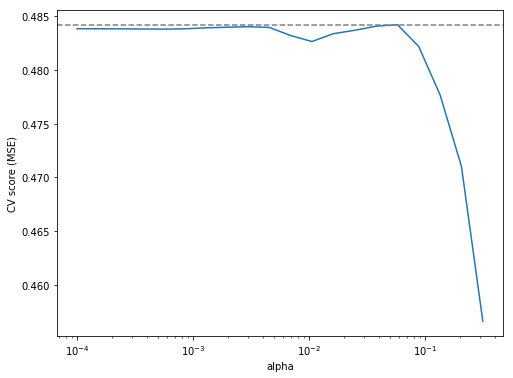

In [10]:
figure(figsize=(8, 6))
semilogx(alphas, scores)
ylabel('CV score (MSE)')
xlabel('alpha')
axhline(np.max(scores), linestyle='--', color='.5')

print np.max(scores)
print 'Best alpha:', alphas[np.argmax(scores)]